In [31]:
# import numpy for math calculations
import numpy as np

# import pandas for data (csv) manipulation
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt

# import seaborn for more plotting options(built on top of matplotlib)
import seaborn as sns

# Supress unnecessary warnings so that the presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# missingno is a  python package especially for visualizing and exploring the missing data of a dataset.
import missingno as msno

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import svm


# display plots on the notebook itself
%matplotlib inline


In [32]:
import random
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42)

In [33]:
# reading the dataset

train = pd.read_csv('./Train.csv', index_col = 0)
test = pd.read_csv('./Test.csv', index_col = 0)

# checking the shape of the data
train.shape

(10864, 226)

In [34]:
# Check the first five rows of the train set
train.head()

,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,...,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
Sample_ID,,,,,,,,,,,,,,,,,,,,,
1,130,129,127,126,123,126,125,124,122,119,...,1.281779,1.281743,1.281720,1.281684,1.281811,1.281788,1.281752,1.281729,1.281693,0
2,161,158,155,153,151,162,159,155,153,151,...,1.359639,1.359608,1.359587,1.359556,1.359683,1.359662,1.359631,1.359610,1.359579,1
3,149,151,154,156,158,154,157,158,160,161,...,1.365005,1.365025,1.365055,1.365075,1.364937,1.364967,1.364988,1.365018,1.365038,0
4,80,78,77,75,73,80,78,77,75,73,...,1.100708,1.100738,1.100759,1.100789,1.100630,1.100650,1.100680,1.100700,1.100731,0
5,117,115,114,112,110,115,113,111,110,108,...,1.284180,1.284130,1.284056,1.284006,1.284125,1.284050,1.284001,1.283926,1.283876,0


In [7]:
# Check the first five rows of the test set
test.head()

,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,...,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif
Sample_ID,,,,,,,,,,,,,,,,,,,,,
10865,111,109,109,110,112,117,114,113,112,113,...,1.310084,1.310153,1.310199,1.310267,1.310313,1.309963,1.310031,1.310077,1.310146,1.310192
10866,189,187,186,185,185,187,186,184,183,183,...,1.332918,1.332943,1.332960,1.332985,1.333002,1.332823,1.332849,1.332865,1.332890,1.332907
10867,38,37,38,40,43,37,37,37,39,42,...,1.238290,1.238371,1.238492,1.238572,1.238693,1.238087,1.238167,1.238288,1.238369,1.238490
10868,134,136,137,138,140,132,133,134,136,138,...,1.300902,1.300895,1.300890,1.300883,1.300879,1.300930,1.300923,1.300919,1.300912,1.300907
10869,340,340,340,340,341,336,336,335,336,337,...,1.355660,1.355597,1.355503,1.355440,1.355345,1.355583,1.355520,1.355426,1.355363,1.355268


<Axes: xlabel='Sample_ID', ylabel='count'>

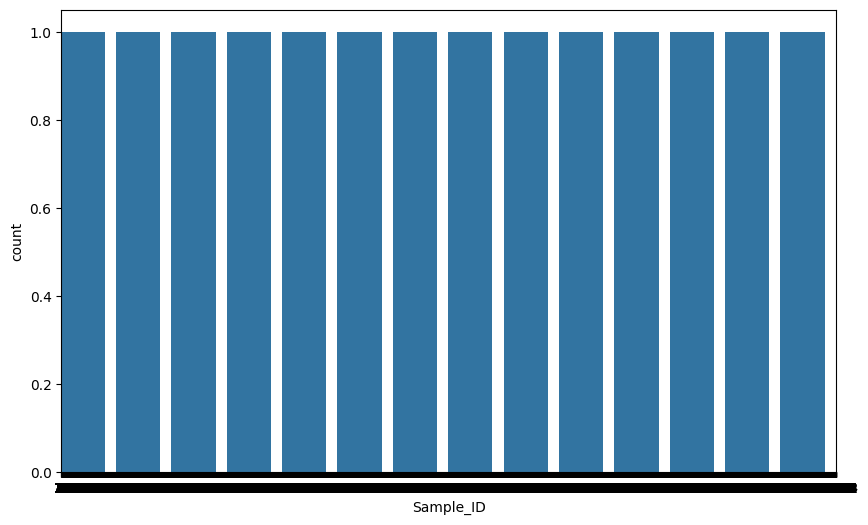

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(train['Label'])

In [11]:
train['Label'].value_counts()

Label
0    8148
1    2716
Name: count, dtype: int64

In [12]:
# Check statistical summaries of the train set
train.describe()

,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,...,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
count,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,...,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000
mean,225.017489,224.925074,224.801730,224.673417,224.586156,225.050994,224.940630,224.792710,224.655468,224.575295,...,1.301055,1.301038,1.301020,1.301000,1.301055,1.301036,1.301018,1.301001,1.300983,0.250000
std,158.419265,158.337494,158.264168,158.217713,158.185548,158.421040,158.333362,158.253865,158.201409,158.165410,...,0.051938,0.051922,0.051905,0.051888,0.051981,0.051965,0.051949,0.051932,0.051916,0.433033
min,3.000000,3.000000,4.000000,2.000000,1.000000,3.000000,4.000000,4.000000,2.000000,1.000000,...,1.092410,1.092404,1.092393,1.092387,1.092354,1.092344,1.092337,1.092326,1.092320,0.000000
25%,101.750000,101.000000,101.000000,101.000000,101.000000,102.000000,101.000000,101.000000,101.000000,102.000000,...,1.286458,1.286418,1.286371,1.286364,1.286440,1.286447,1.286387,1.286365,1.286335,0.000000
50%,191.000000,192.000000,192.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,...,1.308175,1.308136,1.308103,1.308072,1.308206,1.308184,1.308142,1.308116,1.308085,0.000000
75%,312.000000,311.250000,312.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,1.331691,1.331653,1.331616,1.331562,1.331760,1.331731,1.331665,1.331633,1.331575,0.250000
max,901.000000,904.000000,907.000000,909.000000,912.000000,905.000000,908.000000,910.000000,910.000000,911.000000,...,1.370620,1.370627,1.370631,1.370637,1.370607,1.370612,1.370618,1.370623,1.370629,1.000000


<Figure size 2000x1200 with 0 Axes>

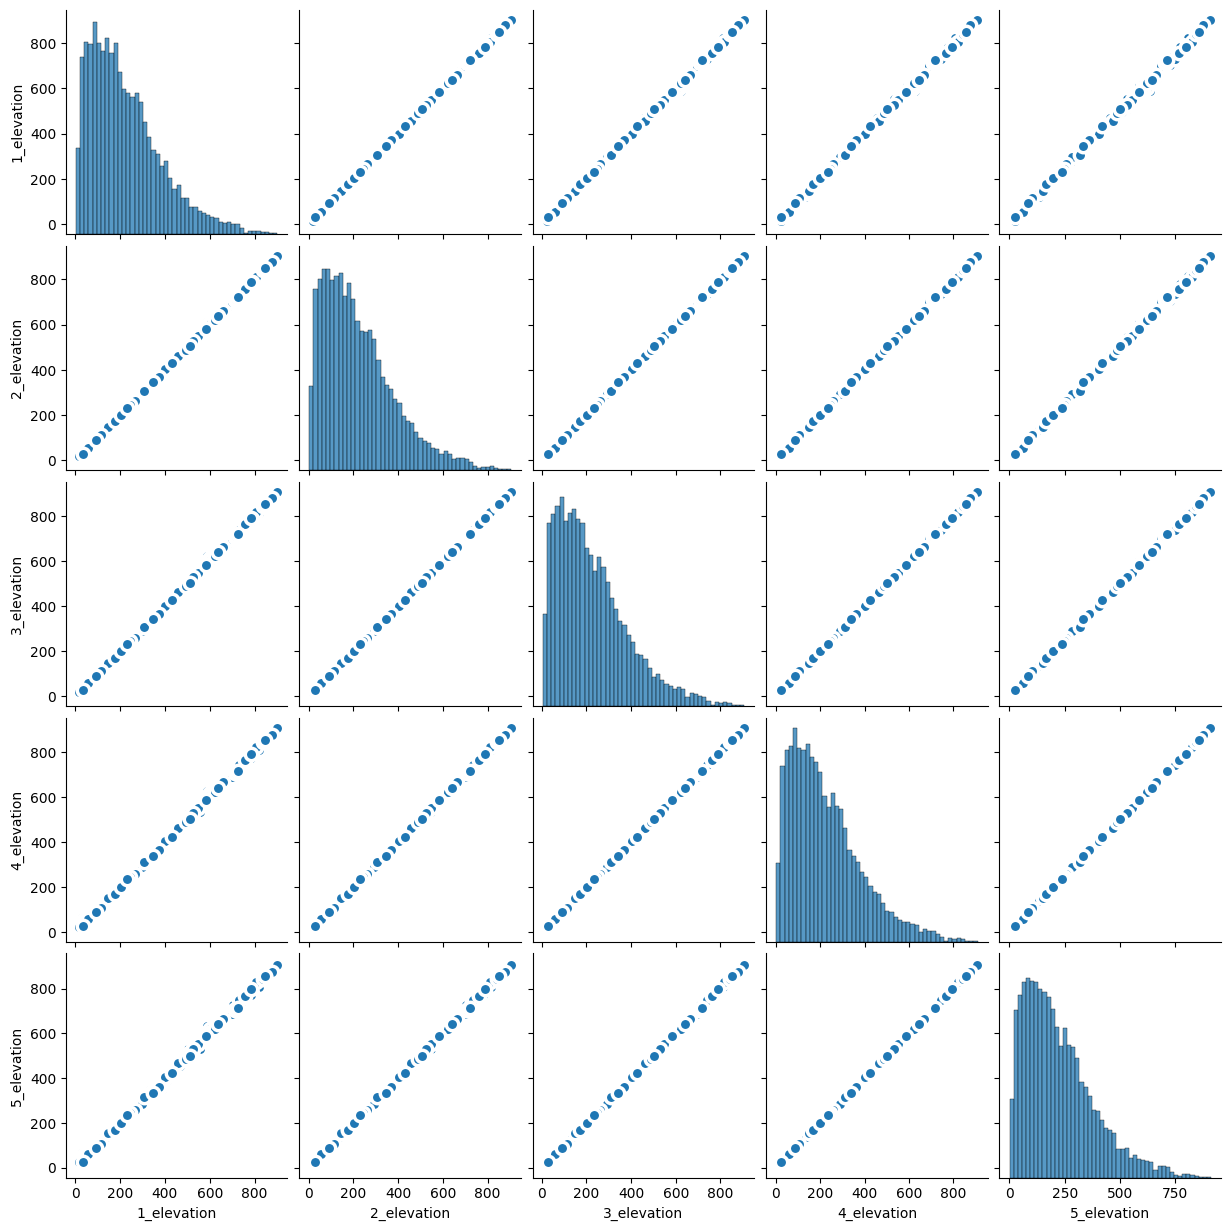

In [13]:
# Elevation correlations
plt.figure(figsize = (20, 12))
sample_elevations = ['1_elevation',	'2_elevation',	'3_elevation',	'4_elevation',	'5_elevation']
sns.pairplot(train[sample_elevations], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [14]:
# Check statistical summaries of the test set
test.describe()

,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,...,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif
count,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,...,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000
mean,226.759300,226.586004,226.370534,226.189871,226.049355,226.825230,226.637017,226.399079,226.185083,226.037937,...,1.302698,1.302677,1.302659,1.302639,1.302619,1.302682,1.302661,1.302642,1.302622,1.302603
std,154.375714,154.249318,154.140357,154.044217,153.999267,154.382078,154.232252,154.115757,154.038464,153.998640,...,0.050228,0.050212,0.050197,0.050182,0.050167,0.050255,0.050238,0.050223,0.050208,0.050193
min,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,...,1.092869,1.092874,1.092878,1.092883,1.092886,1.092794,1.092799,1.092802,1.092807,1.092811
25%,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,...,1.287312,1.287300,1.287297,1.287274,1.287243,1.287333,1.287322,1.287299,1.287276,1.287259
50%,200.000000,199.000000,198.000000,198.000000,199.000000,199.000000,199.000000,199.000000,198.000000,198.500000,...,1.308596,1.308577,1.308564,1.308536,1.308500,1.308616,1.308592,1.308562,1.308523,1.308485
75%,315.000000,314.000000,314.000000,314.000000,314.000000,316.000000,315.000000,314.000000,314.000000,314.000000,...,1.332255,1.332209,1.332178,1.332165,1.332125,1.332278,1.332199,1.332140,1.332108,1.332110
max,903.000000,900.000000,894.000000,888.000000,882.000000,906.000000,903.000000,898.000000,891.000000,883.000000,...,1.370486,1.370493,1.370504,1.370511,1.370521,1.370474,1.370481,1.370492,1.370499,1.370509


In [15]:
# Check for any missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [16]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(True, True)

# Features Engineering

In [17]:
def calc_total(name,DataFrame):
    DataFrame['total_'+name] = 0
    for i in range(1,26):
        DataFrame['total_'+name] +=  DataFrame[str(i)+'_'+name]
    return DataFrame
train=calc_total('slope',train)
test=calc_total('slope',test)
train=calc_total('elevation',train)
test=calc_total('elevation',test)
train=calc_total('sdoif',train)
test=calc_total('sdoif',test)
train=calc_total('lsfactor',train)
test=calc_total('lsfactor',test)
train=calc_total('twi',train)
test=calc_total('twi',test)
train=calc_total('placurv',train)
test=calc_total('placurv',test)
train=calc_total('procurv',train)
test=calc_total('procurv',test)

def slope_range(DataFrame):
    DataFrame['slope_range'] = 0
    for i in range(1,26):
        DataFrame['slope_range'] +=  ((DataFrame[str(i)+'_slope'] < 15) | (DataFrame[str(i)+'_slope'] > 45)).astype(int)
    return DataFrame

# def delete_range(DataFrame,name):
#     gonnaDrop =[]
#     for i in range(1,26):
#         gonnaDrop.append(str(i)+'_'+name)
#     return DataFrame.drop(columns=gonnaDrop)
# train=delete_range(train,'procurv')
# test=delete_range(test,'procurv')



train.head(10)

,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,...,24_sdoif,25_sdoif,Label,total_slope,total_elevation,total_sdoif,total_lsfactor,total_twi,total_placurv,total_procurv
Sample_ID,,,,,,,,,,,,,,,,,,,,,
1,130,129,127,126,123,126,125,124,122,119,...,1.281729,1.281693,0,920.759220,2986,32.043332,225.342353,86.662827,0.316465,-0.222866
2,161,158,155,153,151,162,159,155,153,151,...,1.359610,1.359579,1,713.116670,3905,33.989444,200.345615,116.513413,0.266576,-0.095545
3,149,151,154,156,158,154,157,158,160,161,...,1.365018,1.365038,0,958.406450,4064,34.126354,273.950444,105.694982,0.702151,0.561299
4,80,78,77,75,73,80,78,77,75,73,...,1.100700,1.100731,0,481.782970,1910,27.520452,94.642992,93.446023,0.726599,0.222366
5,117,115,114,112,110,115,113,111,110,108,...,1.283926,1.283876,0,706.448440,2729,32.105513,193.563024,113.551492,-0.114302,-0.191980
6,308,310,314,317,319,303,307,310,313,315,...,1.325647,1.325583,1,902.150370,7670,33.145168,232.224687,95.473527,-0.739196,-0.378038
7,130,130,130,130,129,132,132,132,132,132,...,1.321152,1.321097,0,400.763856,3276,33.035228,65.038096,105.237826,0.266396,0.079556
8,141,139,137,135,132,143,141,139,136,133,...,1.287928,1.287892,0,721.340640,3491,32.199448,158.709341,83.868949,0.378994,0.327065
9,100,102,104,106,109,100,102,104,107,109,...,1.303178,1.303169,0,583.689600,2602,32.577881,221.857850,164.899133,-0.161406,-0.001375


In [18]:
NewFeatures = ['total_slope','total_elevation','total_sdoif','total_twi','total_placurv','total_procurv','Label']
train[NewFeatures].corr()

,total_slope,total_elevation,total_sdoif,total_twi,total_placurv,total_procurv,Label
total_slope,1.000000,0.267663,0.138577,-0.348514,-0.045701,-0.059873,0.344274
total_elevation,0.267663,1.000000,0.352605,-0.118113,0.042642,0.067320,0.072476
total_sdoif,0.138577,0.352605,1.000000,-0.019468,0.008882,-0.007018,0.160888
total_twi,-0.348514,-0.118113,-0.019468,1.000000,-0.623251,-0.483877,-0.242948
total_placurv,-0.045701,0.042642,0.008882,-0.623251,1.000000,0.583861,-0.021193
total_procurv,-0.059873,0.067320,-0.007018,-0.483877,0.583861,1.000000,0.007569
Label,0.344274,0.072476,0.160888,-0.242948,-0.021193,0.007569,1.000000


In [19]:
train.corr()['Label'].sort_values( ascending = False).head(5)

Label       1.000000
8_slope     0.409021
9_slope     0.398591
13_slope    0.393129
14_slope    0.380359
Name: Label, dtype: float64

# Model Building

## Oversampling

In [20]:
X = train.loc[:, train.columns != 'Label' ]
y = train.Label
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
X_resampled = pd.DataFrame(X_over, columns=X.columns)
y_resampled = pd.DataFrame(y_over, columns=['Label'])


## Model : CatBoost

In [22]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.7 MB/s eta 0:00:00


In [23]:
from catboost import CatBoostClassifier
errcb2=[]
y_pred_totcb2=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
from sklearn.metrics import accuracy_score
fold=StratifiedKFold(n_splits=5)#15#5#10
i=1
for train_index, test_index in fold.split(X_resampled,y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
    m2  = CatBoostClassifier(n_estimators=800,eval_metric='Accuracy',od_wait=200, learning_rate=0.1,
                              bootstrap_type='Bernoulli',metric_period=100,max_depth = 8,
                     use_best_model=True)
    m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200,verbose=100,)
    preds=m2.predict(X_test)
    print("Accuracy: ",(accuracy_score(y_test,preds)))
    errcb2.append((accuracy_score(y_test,preds)))
    p2 = m2.predict(test)
    y_pred_totcb2.append(p2)
np.mean(errcb2)

0:	learn: 0.7585916	test: 0.7585916	test1: 0.7647239	best: 0.7647239 (0)	total: 390ms	remaining: 5m 11s
100:	learn: 0.9332617	test: 0.9332617	test1: 0.8800613	best: 0.8800613 (98)	total: 22s	remaining: 2m 32s
200:	learn: 0.9875729	test: 0.9875729	test1: 0.9205521	best: 0.9205521 (200)	total: 42.3s	remaining: 2m 5s
300:	learn: 0.9994630	test: 0.9994630	test1: 0.9269939	best: 0.9276074 (288)	total: 1m 4s	remaining: 1m 46s
400:	learn: 0.9999233	test: 0.9999233	test1: 0.9309816	best: 0.9315951 (390)	total: 1m 24s	remaining: 1m 24s
500:	learn: 1.0000000	test: 1.0000000	test1: 0.9340491	best: 0.9343558 (499)	total: 1m 47s	remaining: 1m 4s
600:	learn: 1.0000000	test: 1.0000000	test1: 0.9337423	best: 0.9349693 (515)	total: 2m 7s	remaining: 42.3s
700:	learn: 1.0000000	test: 1.0000000	test1: 0.9361963	best: 0.9368098 (649)	total: 2m 29s	remaining: 21.1s
799:	learn: 1.0000000	test: 1.0000000	test1: 0.9365031	best: 0.9374233 (750)	total: 2m 49s	remaining: 0us

bestTest = 0.9374233129
bestIteration

0:	learn: 0.7686584	test: 0.7686584	test1: 0.7560601	best: 0.7560601 (0)	total: 298ms	remaining: 3m 57s
100:	learn: 0.9355680	test: 0.9355680	test1: 0.8763424	best: 0.8763424 (100)	total: 22s	remaining: 2m 32s
200:	learn: 0.9874204	test: 0.9874204	test1: 0.9064130	best: 0.9073335 (196)	total: 42.3s	remaining: 2m 5s
300:	learn: 0.9985426	test: 0.9985426	test1: 0.9205278	best: 0.9211415 (298)	total: 1m 4s	remaining: 1m 46s
400:	learn: 1.0000000	test: 1.0000000	test1: 0.9272783	best: 0.9275851 (383)	total: 1m 24s	remaining: 1m 24s
500:	learn: 1.0000000	test: 1.0000000	test1: 0.9272783	best: 0.9297330 (480)	total: 1m 46s	remaining: 1m 3s
600:	learn: 1.0000000	test: 1.0000000	test1: 0.9278920	best: 0.9297330 (480)	total: 2m 6s	remaining: 42s
700:	learn: 1.0000000	test: 1.0000000	test1: 0.9315741	best: 0.9315741 (691)	total: 2m 28s	remaining: 21s
799:	learn: 1.0000000	test: 1.0000000	test1: 0.9312673	best: 0.9315741 (691)	total: 2m 48s	remaining: 0us

bestTest = 0.9315741025
bestIteration = 

0:	learn: 0.7635959	test: 0.7635959	test1: 0.7615833	best: 0.7615833 (0)	total: 279ms	remaining: 3m 42s
100:	learn: 0.9290481	test: 0.9290481	test1: 0.8803314	best: 0.8803314 (100)	total: 22.3s	remaining: 2m 34s
200:	learn: 0.9852727	test: 0.9852727	test1: 0.9285057	best: 0.9297330 (190)	total: 42.5s	remaining: 2m 6s
300:	learn: 0.9990028	test: 0.9990028	test1: 0.9398589	best: 0.9404725 (268)	total: 1m 4s	remaining: 1m 47s
400:	learn: 1.0000000	test: 1.0000000	test1: 0.9447683	best: 0.9447683 (368)	total: 1m 24s	remaining: 1m 24s
500:	learn: 1.0000000	test: 1.0000000	test1: 0.9459957	best: 0.9466094 (464)	total: 1m 46s	remaining: 1m 3s
600:	learn: 1.0000000	test: 1.0000000	test1: 0.9484504	best: 0.9493710 (576)	total: 2m 7s	remaining: 42.1s
700:	learn: 1.0000000	test: 1.0000000	test1: 0.9487573	best: 0.9499847 (671)	total: 2m 29s	remaining: 21.1s
799:	learn: 1.0000000	test: 1.0000000	test1: 0.9502915	best: 0.9502915 (780)	total: 2m 49s	remaining: 0us

bestTest = 0.9502915005
bestIterat

0:	learn: 0.7626755	test: 0.7626755	test1: 0.7667996	best: 0.7667996 (0)	total: 439ms	remaining: 5m 50s
100:	learn: 0.9309657	test: 0.9309657	test1: 0.8926051	best: 0.8926051 (100)	total: 22.3s	remaining: 2m 34s
200:	learn: 0.9867301	test: 0.9867301	test1: 0.9229825	best: 0.9235962 (197)	total: 43s	remaining: 2m 8s
300:	learn: 0.9992330	test: 0.9992330	test1: 0.9380178	best: 0.9386315 (292)	total: 1m 4s	remaining: 1m 46s
400:	learn: 1.0000000	test: 1.0000000	test1: 0.9423136	best: 0.9426204 (398)	total: 1m 25s	remaining: 1m 24s
500:	learn: 1.0000000	test: 1.0000000	test1: 0.9416999	best: 0.9426204 (398)	total: 1m 46s	remaining: 1m 3s
600:	learn: 1.0000000	test: 1.0000000	test1: 0.9435410	best: 0.9441546 (573)	total: 2m 7s	remaining: 42.2s
700:	learn: 1.0000000	test: 1.0000000	test1: 0.9435410	best: 0.9441546 (573)	total: 2m 28s	remaining: 21s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9441546487
bestIteration = 573

Shrink model to first 574 iterations.
Accura

0:	learn: 0.7670476	test: 0.7670476	test1: 0.7437864	best: 0.7437864 (0)	total: 301ms	remaining: 4m
100:	learn: 0.9282810	test: 0.9282810	test1: 0.8803314	best: 0.8803314 (96)	total: 22s	remaining: 2m 32s
200:	learn: 0.9840454	test: 0.9840454	test1: 0.9239030	best: 0.9245167 (196)	total: 42.2s	remaining: 2m 5s
300:	learn: 0.9985426	test: 0.9985426	test1: 0.9377110	best: 0.9389383 (298)	total: 1m 4s	remaining: 1m 46s
400:	learn: 0.9999233	test: 0.9999233	test1: 0.9435410	best: 0.9444615 (389)	total: 1m 24s	remaining: 1m 24s
500:	learn: 1.0000000	test: 1.0000000	test1: 0.9450752	best: 0.9453820 (499)	total: 1m 46s	remaining: 1m 3s
600:	learn: 1.0000000	test: 1.0000000	test1: 0.9459957	best: 0.9478368 (561)	total: 2m 6s	remaining: 41.9s
700:	learn: 1.0000000	test: 1.0000000	test1: 0.9490641	best: 0.9493710 (671)	total: 2m 28s	remaining: 21s
799:	learn: 1.0000000	test: 1.0000000	test1: 0.9493710	best: 0.9502915 (758)	total: 2m 48s	remaining: 0us

bestTest = 0.9502915005
bestIteration = 758

0.9427470129909246

# Feature importance

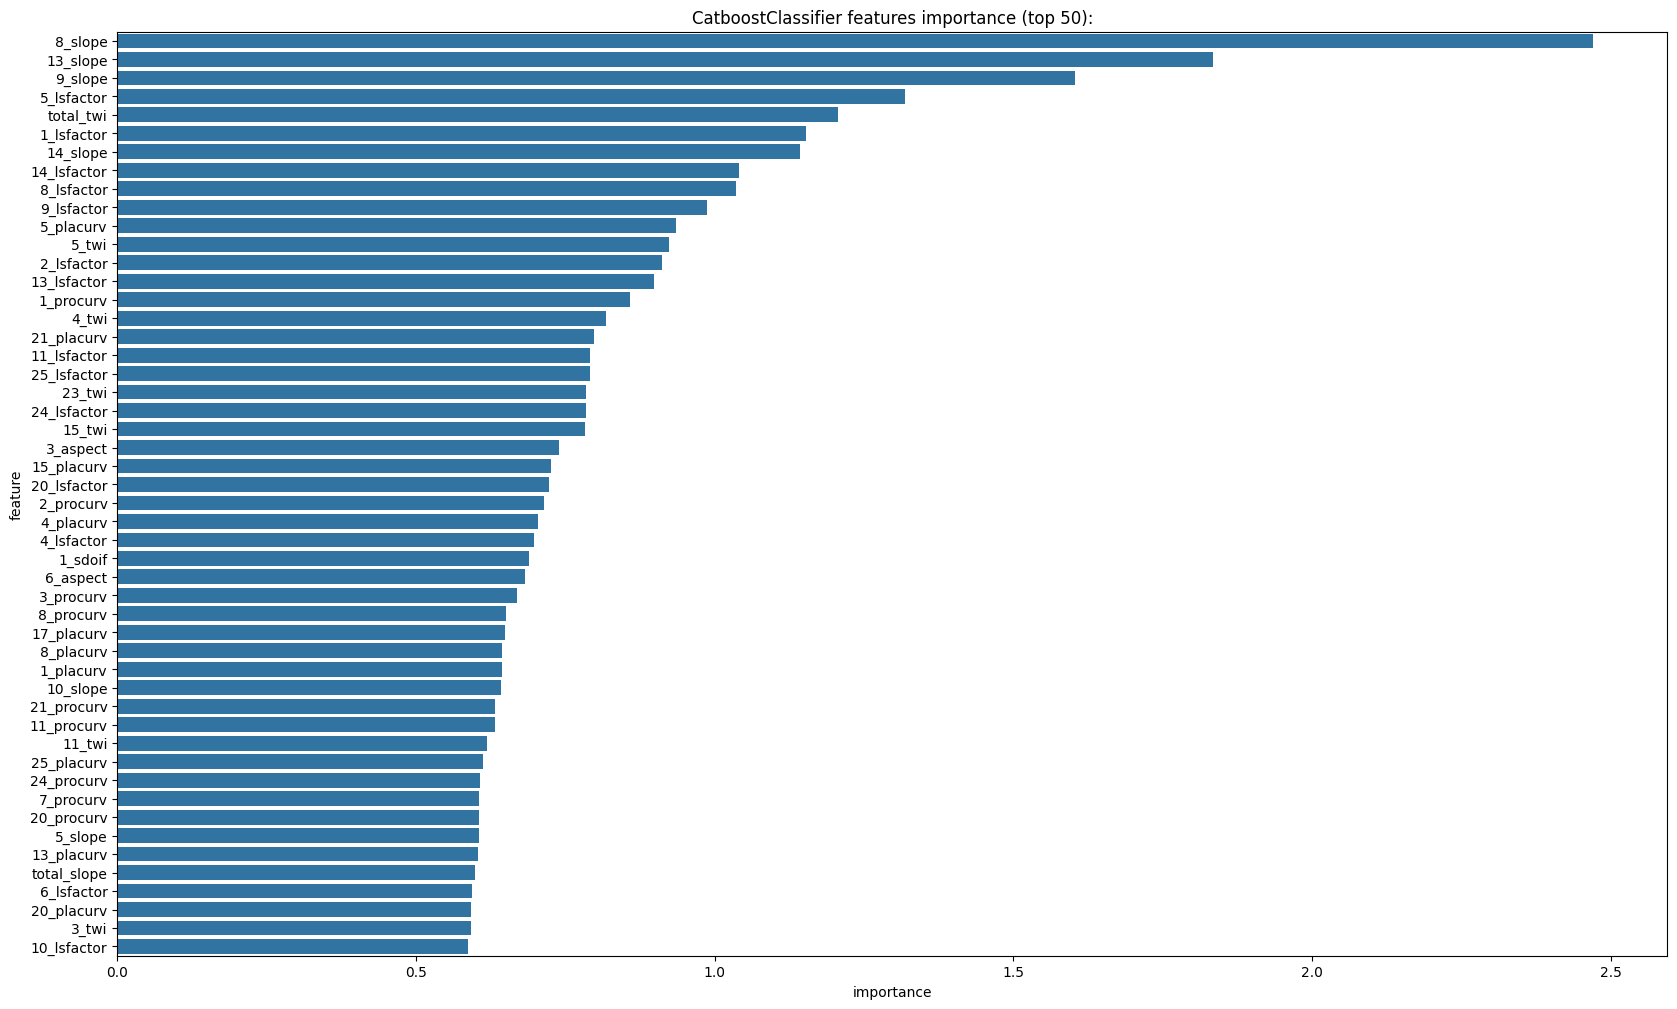

In [24]:
feature_importance_df = pd.DataFrame(m2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('CatboostClassifier features importance (top 50):');

In [25]:
GonnaBeDeleted = feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50)
GonnaBeDeleted = GonnaBeDeleted['feature'].tail(75)
GonnaBeDeleted.tolist()

['8_slope',
 '13_slope',
 '9_slope',
 '5_lsfactor',
 'total_twi',
 '1_lsfactor',
 '14_slope',
 '14_lsfactor',
 '8_lsfactor',
 '9_lsfactor',
 '5_placurv',
 '5_twi',
 '2_lsfactor',
 '13_lsfactor',
 '1_procurv',
 '4_twi',
 '21_placurv',
 '11_lsfactor',
 '25_lsfactor',
 '23_twi',
 '24_lsfactor',
 '15_twi',
 '3_aspect',
 '15_placurv',
 '20_lsfactor',
 '2_procurv',
 '4_placurv',
 '4_lsfactor',
 '1_sdoif',
 '6_aspect',
 '3_procurv',
 '8_procurv',
 '17_placurv',
 '8_placurv',
 '1_placurv',
 '10_slope',
 '21_procurv',
 '11_procurv',
 '11_twi',
 '25_placurv',
 '24_procurv',
 '7_procurv',
 '20_procurv',
 '5_slope',
 '13_placurv',
 'total_slope',
 '6_lsfactor',
 '20_placurv',
 '3_twi',
 '10_lsfactor']

In [26]:
predictions = pd.DataFrame(y_pred_totcb2)

In [27]:
predictions = np.where(np.mean(predictions, axis=0)> 0.30, 1, 0)

In [28]:
submission = pd.DataFrame()
submission['id'] = test.index
submission['Label'] = pd.DataFrame(predictions.T)
submission.to_csv('submission.csv', index=False)

In [30]:
submission

,id,Label
0,10865,1
1,10866,0
2,10867,0
3,10868,1
4,10869,1
...,...,...
5425,16290,0
5426,16291,0
5427,16292,0
5428,16293,0
